# Introduction

Introduction:
This project involves the analysis of two datasets, namely 'observations' and 'species_info,' to explore and gain insights into the biodiversity of various species within different national parks. The initial steps include data loading, cleaning, and exploration to understand the structure and content of the datasets. The project utilizes Python libraries such as pandas, numpy, matplotlib, seaborn, and scipy for statistical analysis and visualization.

Summary:
The project begins with loading and exploring the datasets, investigating potential duplicates, handling missing values, and cleaning the data. Subsequent exploratory data analysis involves examining unique categories, conservation status distribution, and the number of species in each category. The investigation uncovers interesting patterns, such as the dominance of Vascular Plant species and the prevalence of stable conservation status. Deeper exploration includes examining endangered species across different categories, revealing birds as the category with the highest count of species of concern and mammals as the highest count of endangered species.

Furthermore, a detailed analysis explores the proportion of protected species within each category, leading to visualizations highlighting the variations in protection levels. Finally, Chi-squared tests are conducted to assess the statistical significance of conservation status differences between selected species categories. The results suggest that, according to the dataset, there is no significant relationship between mammals and birds. However, there is a statistically significant difference between mammals and reptiles, indicating a higher rate of protection needed for mammals.

Conclusion:
In conclusion, this project provides valuable insights into the biodiversity and conservation status of species across different categories within national parks. The analyses highlight patterns, proportions, and statistical differences that contribute to a better understanding of the species landscape. The findings can guide further research efforts and conservation strategies, emphasizing the importance of protecting vulnerable species.

Data sources: Both Observations.csv and Species_info.csv was provided by Codecademy.com.

### Loading the Data

In [159]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
from scipy.stats import chi2_contingency
import seaborn as sns
%matplotlib inline

missing_values= ['N/a', 'N/A', 'NaN', 'n/a', np.nan]
species_observations =  pd.read_csv('observations.csv',encoding='utf-8', na_values = missing_values)
species_info = pd.read_csv('species_info.csv',encoding='utf-8', na_values = missing_values)

### Initial Data Exploration

In [160]:
column_to_sort_1 = 'scientific_name'
species_observations.sort_values(by=column_to_sort_1, inplace=True)
species_observations.head()

,scientific_name,park_name,observations
8050,Abies bifolia,Yellowstone National Park,215
4968,Abies bifolia,Bryce National Park,109
17990,Abies bifolia,Great Smoky Mountains National Park,72
20930,Abies bifolia,Yosemite National Park,136
4647,Abies concolor,Great Smoky Mountains National Park,101


In [161]:
column_to_sort_2 = 'scientific_name'
species_info.sort_values(by=column_to_sort_2, inplace=True)
species_info.head()

,category,scientific_name,common_names,conservation_status
4061,Vascular Plant,Abies bifolia,Rocky Mountain Alpine Fir,NaN
5443,Vascular Plant,Abies concolor,"Balsam Fir, Colorado Fir, Concolor Fir, Silver...",NaN
1928,Vascular Plant,Abies fraseri,Fraser Fir,Species of Concern
2908,Nonvascular Plant,Abietinella abietina,Abietinella Moss,NaN
3736,Vascular Plant,Abronia ammophila,"Wyoming Sand Verbena, Yellowstone Sand Verbena",Species of Concern


In [162]:
#Lets take a look at at the shape of each table
print(f"species_observations shape: {species_observations.shape}")
print(f"species_info shape: {species_info.shape}")

species_observations shape: (23296, 3)
species_info shape: (5824, 4)


In [163]:
#Lets see if there are more unique scientific names under observations or info.
print(f"Number of Scientific Names under observations table: {species_observations.scientific_name.nunique()}")
print(f"Number of Scientific Names under species table: {species_info.scientific_name.nunique()}")
#We can see that each table contains the same names. Both tables are finding on the same set of living things.

Number of Scientific Names under observations table: 5541
Number of Scientific Names under species table: 5541


### Cleaning the Data

In [164]:
#Lets see if there are any duplicates.

columns_to_check_1 = ['scientific_name','park_name', 'observations']

duplicated_rows_1 = species_observations.duplicated(subset=columns_to_check_1, keep=False).sum()

print(f'True Duplicates in Observations: {duplicated_rows_1}')

columns_to_check_2 = ['category', 'scientific_name','common_names', 'conservation_status']

duplicated_rows_2 = species_info.duplicated(subset=columns_to_check_2, keep=False).sum()

print(f'True Duplicates in Species: {duplicated_rows_2}')

True Duplicates in Observations: 30
True Duplicates in Species: 0


In [165]:
#Lets Remove the Duplicates

species_observations.drop_duplicates(subset=columns_to_check_1, keep='first', inplace=True)

columns_to_check_1 = ['scientific_name','park_name', 'observations']

duplicated_rows_1 = species_observations.duplicated(subset=columns_to_check_1, keep=False).sum()

print(f'True Duplicates in Observations: {duplicated_rows_1}')

True Duplicates in Observations: 0


In [166]:
#Checking for null values of both tables 

species_observations.isnull().sum()
species_info.isnull().sum()

#It looks like only species_info has null values under conservations_status.

category                  0
scientific_name           0
common_names              0
conservation_status    5633
dtype: int64

In [167]:
#Adding "stable" in the conservation_status to replace all null_values.

replacement_string = 'Stable'
species_info['conservation_status'] = species_info['conservation_status'].fillna(replacement_string)
conservation_status_counts = species_info['conservation_status'].value_counts() 
print(conservation_status_counts)

conservation_status
Stable                5633
Species of Concern     161
Endangered              16
Threatened              10
In Recovery              4
Name: count, dtype: int64


In [168]:
#Removing all the additional names of common_names
species_info['common_names'] = species_info['common_names'].str.split(',').str[0]

#Removing commas and parenthesis from commons_names
species_info['common_names'] = species_info['common_names'].str.replace(r'\([^)]*\)', '', regex=True)
species_info['common_names'] = species_info['common_names'].str.replace(r'\b\s*Or\s*\b', ' ', regex=True)

## Deeper Exploration

Lets take a deeper look at some of the data within the species_info dataset.

In [169]:
#Lets see how many unique categories there are.
print(f"number of categories: {species_info.category.nunique()}")
print(f"Categories: {species_info.category.unique()}")

number of categories: 7
Categories: ['Vascular Plant' 'Nonvascular Plant' 'Bird' 'Amphibian' 'Reptile'
 'Mammal' 'Fish']


In [170]:
#What category contains the largest share of species in the dataset?
species_info.groupby('category').size()

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

By far, the Vascular Plant category is the largest count that appears in the dataset.

In [171]:
#What conservation status has the highest count?
species_info.groupby('conservation_status').size()

conservation_status
Endangered              16
In Recovery              4
Species of Concern     161
Stable                5633
Threatened              10
dtype: int64

Upon analysis of the dataset, we observe that 5633 species are classified as stable, while 4 are transitioning towards stability. Conversely, 187 species are currently trending towards extinction. To gain further insights, let's examine the conservation status count within each category and identify the category with the highest count of endangered species.

In [172]:
species_info.pivot_table(index='category', columns='conservation_status', aggfunc='size', fill_value=0)

conservation_status,Endangered,In Recovery,Species of Concern,Stable,Threatened
category,,,,,
Amphibian,1,0,4,73,2
Bird,4,3,72,442,0
Fish,3,0,4,116,4
Mammal,7,1,28,176,2
Nonvascular Plant,0,0,5,328,0
Reptile,0,0,5,74,0
Vascular Plant,1,0,43,4424,2


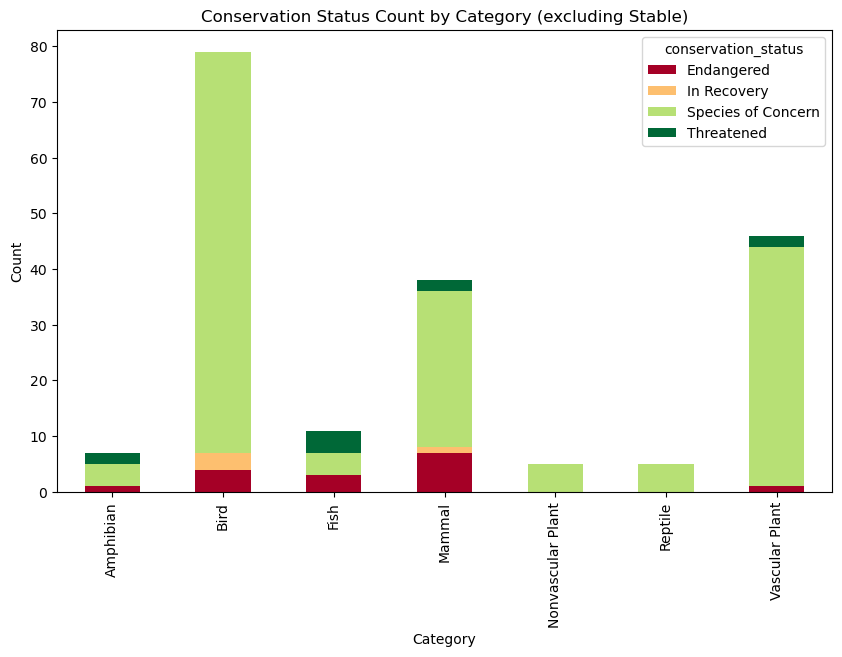

In [173]:
# Create a pivot table to count conservation_status within each category
pivot_table = species_info.pivot_table(index='category', columns='conservation_status', aggfunc='size', fill_value=0)

# Remove 'Stable' category from the pivot table
pivot_table = pivot_table.drop(columns='Stable', errors='ignore')

# Plot the bar chart
pivot_table.plot(kind='bar', stacked=True, colormap='RdYlGn', figsize=(10, 6))

# Adding labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Conservation Status Count by Category (excluding Stable)')

# Display the plot
plt.show()

The analysis reveals that bird species exhibit the highest cumulative count across species of concern. On the other hand, the mammal category stands out with the highest count in the endangered category. Notably, both nonvascular plants and reptiles exclusively contain species categorized as 'species of concern.' A key takeaway is that species across all categories show signs of either transitioning towards endangerment, species of concern, or being threatened.

Let's delve further into this by examining which types of species are at a higher risk of endangerment. To begin, we'll initiate the process by creating a new column.

In [174]:
species_info['is_protected'] = species_info.conservation_status != 'Stable'

In [175]:
category_counts = species_info.groupby(['category', 'is_protected'])\
.scientific_name.nunique()\
.reset_index()\
.pivot(columns='is_protected',
      index='category',
      values='scientific_name')\
.reset_index()

category_counts.columns = category_counts.columns.get_level_values(0)
category_counts.columns = ['category', 'not_protected', 'protected']

category_counts

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


In [176]:
category_counts['percent_protected'] = category_counts.protected / \
(category_counts.protected + category_counts.not_protected)

category_counts

,category,not_protected,protected,percent_protected
0,Amphibian,72,7,0.088608
1,Bird,413,75,0.153689
2,Fish,115,11,0.087302
3,Mammal,146,30,0.170455
4,Nonvascular Plant,328,5,0.015015
5,Reptile,73,5,0.064103
6,Vascular Plant,4216,46,0.010793


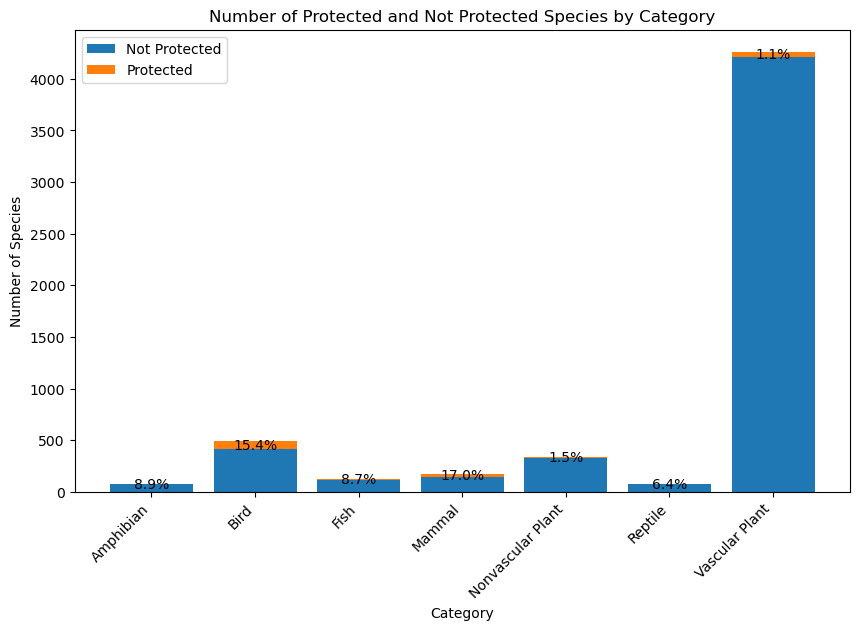

In [177]:
plt.figure(figsize=(10, 6))
plt.bar(category_counts['category'], category_counts['not_protected'], label='Not Protected')
plt.bar(category_counts['category'], category_counts['protected'], bottom=category_counts['not_protected'], label='Protected')

for index, row in category_counts.iterrows():
    plt.text(index, row['not_protected'] + row['protected'] / 2, f"{row['percent_protected']:.1%}", ha='center', va='center')

plt.xlabel('Category')
plt.ylabel('Number of Species')
plt.title('Number of Protected and Not Protected Species by Category')
plt.legend()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

In our visualization, we observe that the bird category has the highest count of protected species, while the reptile category has the lowest. Although this observation alone doesn't explain the underlying reasons, it serves as a valuable starting point, guiding our research toward understanding why certain categories exhibit higher or lower numbers of protected species. This insight can inform the direction of our research efforts.

Now, let's conduct Chi-squared tests to determine whether there are statistically significant differences in conservation status rates among different species.

In [182]:
#Lets check the relationship between Mammal and Birds.
contingency1 = [[30, 146],
               [75, 413]]

chi2_contingency(contingency1)

Chi2ContingencyResult(statistic=0.1617014831654557, pvalue=0.6875948096661336, dof=1, expected_freq=array([[ 27.8313253, 148.1686747],
       [ 77.1686747, 410.8313253]]))

The p-value for the comparison between Mammals and Birds is 0.69. When compared to the standard significance level of 0.05, it suggests that there is no significant relationship between them.

In [183]:
#Lets check the relationship between Reptile and Mammal.

In [185]:
contingency2 = [[30, 146],
               [5, 73]]

chi2_contingency(contingency2)

Chi2ContingencyResult(statistic=4.289183096203645, pvalue=0.03835559022969898, dof=1, expected_freq=array([[ 24.2519685, 151.7480315],
       [ 10.7480315,  67.2519685]]))

The p-value for the comparison between Mammals and Reptiles is 0.03. When compared to the standard significance level of 0.05, it suggests that there is statistically significance between the two. It can be states that according to this dataset, mammals are shown to have a higher rate of needed protection then reptiles. 